In [20]:
#!pip3 install pandas ipython[all] jupyter --user

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
import operator
import math
from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import TfidfVectorizer

/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:

def Distance(x, y):
    distance = 0
    for i in range(len(x)-1):
        distance += pow((x[i]-y[i]), 2)
    return math.sqrt(distance)

In [4]:
 
def kNeighbors(data, query, k):
    distances = []
    neighbors = []
   
    for i in range(len(data)):
        distance = Distance(data[i], query)
        distances.append((data[i], distance))
    distances.sort(key=operator.itemgetter(1))
    #print(type(distances))
    #print(distances)
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors


In [5]:
def Predict(neighbors):
    predicted = {}
    for i in range(len(neighbors)):
        output = neighbors[i][-1]
        if output in predicted:
            predicted[output] += 1
        else:
            predicted[output] = 1
    pre = sorted(predicted.items(), key=operator.itemgetter(1), reverse=True)
    #print(pre)
    return pre[0][0]

In [6]:
def main(i,train_data,test_data,y_test):
    y_pred=[]
    k = i
    for i in range(len(test_data)):
        neighbors = kNeighbors(train_data, test_data[i], k)
        result = Predict(neighbors)
        y_pred.append(result)
    accuracy = accuracy_score(y_test, y_pred)
    f1scoremacro = f1_score(y_test, y_pred,average='macro')
    f1scoremicro = f1_score(y_test, y_pred,average='micro')
    return accuracy,f1scoremacro,f1scoremicro


In [7]:
dolphins=pd.read_csv("../data/dolphins/dolphins.csv",encoding = 'utf8',sep='\s+',header=None)
from sklearn.metrics import f1_score
def evaluation_dolphinsKNN():
    Accuracy=dict()
    F1scoremacro=dict()
    F1scoremicro=dict()
    for i in range(2,int(dolphins.shape[1]/2 +1),2):
        filename =  '../Reduced_dim/dolphins/dolphins_%d.csv'%(i,)
        print(filename)
        X=pd.read_csv(filename,encoding = 'utf8',header=None)
        y=pd.read_csv("../data/dolphins/dolphins_label.csv",encoding = 'utf8',names = ["label"])
        
        X = np.array(X)
        y = np.array(y)
    
        kf = KFold(y.shape[0],n_folds=10)
        
        
        accuracies=[]
        f1scoremacro=[]
        f1scoremicro=[]
        for train_index, validation_index in kf:
           #print("TRAIN:", train_index, "TEST:", test_index)
            
            #print(X)
            
            X_train, X_val = X[train_index], X[validation_index]
            y_train, y_val = y[train_index], y[validation_index]
            df_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)],axis = 1)
            df_test = pd.concat([pd.DataFrame(X_val),pd.DataFrame( y_val)],axis = 1)
            train_data = df_train.values.tolist()
            val_data = df_test.values.tolist()
            accuracy,f1_scoremacro,f1_scoremicro = main(3,train_data,val_data,y_val)
            accuracies.append(accuracy)
            f1scoremacro.append(f1_scoremacro)
            f1scoremicro.append(f1_scoremicro)
        Accuracy[i]=sum(accuracies)/float(len(accuracies))
        F1scoremacro[i]=sum(f1scoremacro)/float(len(f1scoremacro))
        F1scoremicro[i]=sum(f1scoremicro)/float(len(f1scoremicro))
    return Accuracy,F1scoremacro,F1scoremicro
        
        
        
        

In [8]:
Accuracy,F1scoremacro,F1scoremicro = evaluation_dolphinsKNN()

../Reduced_dim/dolphins/dolphins_2.csv
../Reduced_dim/dolphins/dolphins_4.csv
../Reduced_dim/dolphins/dolphins_6.csv
../Reduced_dim/dolphins/dolphins_8.csv


/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


../Reduced_dim/dolphins/dolphins_10.csv
../Reduced_dim/dolphins/dolphins_12.csv
../Reduced_dim/dolphins/dolphins_14.csv
../Reduced_dim/dolphins/dolphins_16.csv


In [10]:
import pickle


f = open("evaluation_dolphinsKNN", "wb")
pickle.dump(Accuracy,f)
pickle.dump(F1scoremacro, f)
pickle.dump(F1scoremicro,f)
f.close()

In [11]:
dolphins=pd.read_csv("../data/dolphins/dolphins.csv",encoding = 'utf8',sep='\s+',header=None)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
def evaluation_dolphinsKNN():
    Accuracy=dict()
    F1scoremacro=dict()
    F1scoremicro=dict()
    for i in range(2,int(dolphins.shape[1]/2 +1),2):
        filename =  '../Reduced_dim/dolphins/dolphins_%d.csv'%(i,)
        print(filename)
        X=pd.read_csv(filename,encoding = 'utf8',header=None)
        y=pd.read_csv("../data/dolphins/dolphins_label.csv",encoding = 'utf8',names = ["label"])
        
        X = np.array(X)
        y = np.array(y)
    
        kf = KFold(y.shape[0],n_folds=10)
        
        
        accuracies=[]
        f1scoremacro=[]
        f1scoremicro=[]
        for train_index, validation_index in kf:
           #print("TRAIN:", train_index, "TEST:", test_index)
            
            #print(X)
            
            X_train, X_val = X[train_index], X[validation_index]
            y_train, y_val = y[train_index], y[validation_index]
            from sklearn.neighbors import KNeighborsClassifier
            neigh = KNeighborsClassifier(n_neighbors=3)
            neigh.fit(X_train, y_train) 
            y_pred=neigh.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            f1_scoremacro = f1_score(y_val, y_pred,average='macro')
            f1_scoremicro = f1_score(y_val, y_pred,average='micro')
            
            accuracies.append(accuracy)
            f1scoremacro.append(f1_scoremacro)
            f1scoremicro.append(f1_scoremicro)
        Accuracy[i]=sum(accuracies)/float(len(accuracies))
        F1scoremacro[i]=sum(f1scoremacro)/float(len(f1scoremacro))
        F1scoremicro[i]=sum(f1scoremicro)/float(len(f1scoremicro))
    return Accuracy,F1scoremacro,F1scoremicro



In [12]:
Accuracy,F1scoremacro,F1scoremicro =evaluation_dolphinsKNN()

../Reduced_dim/dolphins/dolphins_2.csv
../Reduced_dim/dolphins/dolphins_4.csv
../Reduced_dim/dolphins/dolphins_6.csv
../Reduced_dim/dolphins/dolphins_8.csv
../Reduced_dim/dolphins/dolphins_10.csv
../Reduced_dim/dolphins/dolphins_12.csv


/home/nidhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


../Reduced_dim/dolphins/dolphins_14.csv
../Reduced_dim/dolphins/dolphins_16.csv


In [13]:
import pickle


f = open("evaluation_dolphinsKNNPCA", "wb")
pickle.dump(Accuracy,f)
pickle.dump(F1scoremacro, f)
pickle.dump(F1scoremicro,f)
f.close()

In [76]:
import matplotlib.pyplot as plt
def plot(dimensions,accuracieskn,f1scoreskn,accuraciesnb,f1scoresnb):
    #plt.figure(1)                # the first figure
    #plt.subplot(221)             # the first subplot in the first figure
    plt.plot(Accuracies.keys(),Accuracies.value())
    #plt.subplot(222)             # the second subplot in the first figure
    #plt.plot(dimensions,f1scoreskn)
    #plt.subplot(223)             # the second subplot in the first figure
    #plt.plot(dimensions,accuraciesnb)
    #plt.subplot(224)             # the second subplot in the first figure
    #plt.plot(dimensions,f1scoresnb)
    #plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
   
    plt.show()
    

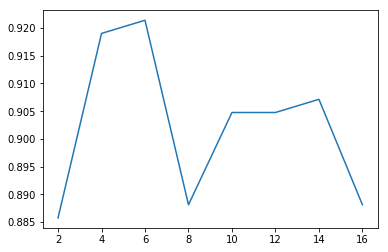

In [77]:
plt.plot(Accuracy.keys(),Accuracy.values())
plt.show()

In [19]:
dimensionpubmed,accuracypubmed,f1scorepubmed = evaluation_pubmed()

../Reduced_dim/pubmed/pubmed_2.csv
../Reduced_dim/pubmed/pubmed_4.csv
../Reduced_dim/pubmed/pubmed_6.csv
../Reduced_dim/pubmed/pubmed_8.csv
../Reduced_dim/pubmed/pubmed_10.csv
../Reduced_dim/pubmed/pubmed_12.csv
../Reduced_dim/pubmed/pubmed_14.csv
../Reduced_dim/pubmed/pubmed_16.csv
../Reduced_dim/pubmed/pubmed_18.csv
../Reduced_dim/pubmed/pubmed_20.csv
../Reduced_dim/pubmed/pubmed_22.csv
../Reduced_dim/pubmed/pubmed_24.csv
../Reduced_dim/pubmed/pubmed_26.csv
../Reduced_dim/pubmed/pubmed_28.csv
../Reduced_dim/pubmed/pubmed_30.csv
../Reduced_dim/pubmed/pubmed_32.csv
../Reduced_dim/pubmed/pubmed_34.csv
../Reduced_dim/pubmed/pubmed_36.csv
../Reduced_dim/pubmed/pubmed_38.csv
../Reduced_dim/pubmed/pubmed_40.csv
../Reduced_dim/pubmed/pubmed_42.csv
../Reduced_dim/pubmed/pubmed_44.csv
../Reduced_dim/pubmed/pubmed_46.csv
../Reduced_dim/pubmed/pubmed_48.csv
../Reduced_dim/pubmed/pubmed_50.csv
../Reduced_dim/pubmed/pubmed_52.csv
../Reduced_dim/pubmed/pubmed_54.csv
../Reduced_dim/pubmed/pubmed_56.

In [22]:

import pickle
#pubmedResult = "pickle.dat"
'''
f = open("pubmedResultNN", "wb")
pickle.dump(dimensionpubmed,f)
pickle.dump(accuracypubmed, f)
pickle.dump(f1scorepubmed,f)
f.close()





#with open(pubmedResult, "rb") as f:
#    print pickle.load(f)
    

In [23]:
f = open("pubmedResultNN", "rb")
value1 = pickle.load(f)
value2 = pickle.load(f)
value3 = pickle.load(f)
f.close()


In [24]:
value2

[0.36633663366336633,
 0.37937696208645255,
 0.3670610963535378,
 0.3750301859454238,
 0.36078241970538516,
 0.3733397730016904,
 0.36947597198744264,
 0.36416324559285196,
 0.37261531031151895,
 0.3786524993962811,
 0.35933349432504225,
 0.3730982854382999,
 0.363680270466071,
 0.36609514609997584,
 0.3718908476213475,
 0.3704419222410046,
 0.37913547452306207,
 0.3786524993962811,
 0.3697174595508331,
 0.37237382274812847,
 0.3784110118328906,
 0.3738227481284714,
 0.3699589471142236,
 0.3764791113257667,
 0.36585365853658536,
 0.37261531031151895,
 0.38420671335426226,
 0.37285679787490944,
 0.3752716735088143,
 0.3769620864525477,
 0.3781695242695001,
 0.37575464863559527]

In [2]:
import pickle
f = open("pubmedResultNN", "rb")
value1 = pickle.load(f)
value2 = pickle.load(f)
value3 = pickle.load(f)
f.close()


In [3]:
value1

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64]

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

file = '../data/twitter/twitter.txt'
with open(file) as f:
    content = f.readlines()
content = [str(x.strip()) for x in content] 

vectorizer = TfidfVectorizer()
vectorizer.fit(content)
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(content)
# summarize encoded vector
#print(vector.shape)
X = vector.toarray()

file_y = '../data/twitter/twitter_label.txt'
with open(file_y) as f:
    content_y = f.readlines()
y = [str(x.strip()) for x in content_y] 

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
df_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)],axis = 1)

In [15]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2969,2970,2971,2972,2973,2974,2975,2976,2977,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33836,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.411082,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [12]:
df2=pd.DataFrame(X)
print(df2)

      0     1        2     3     4     5     6     7     8     9     ...   \
0      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
1      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
2      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
3      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
4      0.0   0.0  0.17558   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
5      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
6      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
7      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
8      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
9      0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
10     0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
11     0.0   0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    

In [13]:
X.shape


(6000, 2978)

In [83]:
from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import TfidfVectorizer

def twitterKNN():
    Accuracy=dict()
    F1scoremacro=dict()
    F1scoremicro=dict()
    
    
    
    file = "../data/twitter/twitter.txt"
    with open(file) as f:
        
        content = f.readlines()
        
    content = [str(x.strip()) for x in content] 
    
        
    #print(content)
    file_y = "../data/twitter/twitter_label.txt"
    with open(file_y) as f:
        content_y = f.readlines()
    y = [str(x.strip()) for x in content_y]

    X_train, X_test, y_train, y_test = train_test_split(content,y, test_size=0.20, random_state=42)
   
    X = np.array(X_train)
    y = np.array(y_train)
    kf = KFold(y.shape[0],n_folds=10)
    print(X.shape)
    print(y.shape)
    
    l=0
    for i in range(2,4,1):
        accuracies=[]
        f1scoremacro=[]
        f1scoremicro=[]
        for train_index, validation_index in kf:
           #print("TRAIN:", train_index, "TEST:", test_index)
            print (l)
            #print(X)
            l+=1
            X_train, X_val = X[train_index], X[validation_index]
            y_train, y_val = y[train_index], y[validation_index]
            vectorizer = TfidfVectorizer()
            vectorizer.fit(X_train)
            vector_X = vectorizer.transform(X_train)
            X = vector_X.toarray()
            vector = vectorizer.transform(X_val)
            X_val1 = vector.toarray()

            df_train = pd.concat([pd.DataFrame(X), pd.DataFrame(y_train)],axis = 1)
            df_test = pd.concat([pd.DataFrame(X_val1),pd.DataFrame( y_val)],axis = 1)
            train_data = df_train.values.tolist()
            val_data = df_test.values.tolist()
            accuracy,f1_scoremacro,f1_scoremicro = main(i,train_data,val_data,y_val)
            accuracies.append(accuracy)
            f1scoremacro.append(f1_scoremacro)
            f1scoremicro.append(f1_scoremicro)
        Accuracy[i]=sum(accuracies)/float(len(accuracies))
        F1scoremacro[i]=sum(f1scoremacro)/float(len(f1scoremacro))
        F1scoremicro[i]=sum(f1scoremicro)/float(len(f1scoremicro))
        
            #print("Nearest neighbor self created")
            #print("Test accuracy :: ",accuracy)
            #print("Test Macro F1-score :: ",f1_scoremacro)
            #print("Test Micro F1-score :: ",f1_scoremicro)
    return Accuracy,F1scoremacro,F1scoremicro,X_test,y_test,X_train,y_train


    

In [ ]:
Accuracy,F1scoremacro,F1scoremicro,X_test,y_test,X_train,y_train = twitterKNN()

(4800,)
(4800,)
0


In [76]:
Accuracy

{}